## INTRODUTION TO BUSINESS PROBLEM:
Singaporeans' love affair with bubble has been well documented pre-pandemic as well as during the pandemic. Even with restrictions on dining-in hit drink stalls at hawker centers, foodcourts and restraurants hard, but bubble tea joints continue to enjoy roaring success evidenced by unedning ques of customers and food delivery riders at bubble tea shops. As reported in The Straits Times, Nayuki, a chinese bubble tea chain raised more than US$650 million in an initial public offering (IPO). This project will explore the best location with high human traffic to set-up a bubble tea shop. The locations with high human traffic is usually located around Mass Rapid Transit (MRT) stations which us one of the 2 main modes of transportations in Singapore, with the other one being the bus. As such, we will explore the best location which would be one with the fewest number of bubble tea joints within the vicinity and closest to Singapore's Central Business District to set-up a bubble tea shop within walking distance (300m radius) from a MRT station. 

# Data:
For this project, I'll leverage Singapore MRTs' coordinate dataset from yxlee https://www.kaggle.com/yxlee245/singapore-train-station-coordinates. As this dataset contains both MRT and LRT, we'll need to remove remove LRT from the dataset before using it 

1. Singapore MRT coordinates dataset from a csv file


I'll also be using the FourSquare API to obtain all the bubble tea joints within 250m radius from the MRT stations located in the Singapore MRTs' coordinates dataset. Features of interest will be
1. Venue
2. Venue Latitude
3. Venue Longitude
4. Venue Category Data

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

## Data Wrangling for Singapore MRT's coordinates
Singapore MRTs' coordinate dataset from yxlee https://www.kaggle.com/yxlee245/singapore-train-station-coordinates. 

Let's clean up the dataset to only refer to MRT coordinates

In [2]:
#Load Singapore's MRT and LRT coordinates
sg_mrt=pd.read_csv("mrt_lrt_data.csv")
sg_mrt

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523
...,...,...,...,...
152,Punggol Point,LRT,1.416932,103.906680
153,Samudera,LRT,1.415955,103.902185
154,Nibong,LRT,1.411865,103.900321
155,Sumang,LRT,1.408501,103.898605


In [3]:
#Get unique types in column "type"
sg_mrt['type'].unique()

array(['MRT', 'LRT'], dtype=object)

In [4]:
#As main focus is on MRT, drop rows that do not contain MRT
sg_mrt=sg_mrt.loc[(sg_mrt["type"]=="LRT")==False]
sg_mrt

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523
...,...,...,...,...
114,Bedok North,MRT,1.335268,103.918054
115,Bedok Reservoir,MRT,1.336595,103.933070
116,Tampines West,MRT,1.345583,103.938244
117,Tampines East,MRT,1.356310,103.955471


## Get bubble tea shop locations in Singapore - Test Query Output

Now, let's get a list of bubble tea joints in Singapore that are within 300m radius from each MRT Station. First, we test out the query output with a sample MRT station, in this case, we use Jurong East. Bubble tea joints category ID is 52e81612bcbc57f1066b7a0c

Then we create a loop to query all bubble tea joints within 300m radius from each MRT station. 

In [148]:
#https://foursquare.com/oauth2/authenticate?client_id=YOUR_CLIENT_ID&response_type=code&redirect_uri=https://www.google.com
#https://foursquare.com/oauth2/access_token?client_id=YOUR_CLIENT_ID&client_secret=YOUR_CLIENT_SECRET&grant_type=authorization_code&redirect_uri=https://www.google.com&code=CODE

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
#LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [9]:
mrt_list = list(sg_mrt['station_name'])
lat_list = list(sg_mrt['lat'])
lng_list = list(sg_mrt['lng'])

In [12]:
#Bubble Tea joints category ID is 52e81612bcbc57f1066b7a0c, search for bubble tea joints within 300m radius from each MRT
search_query = '52e81612bcbc57f1066b7a0c'
radius = 300

In [13]:
#Use Jurong East to test results
lat=1.333207
lng=103.742308
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng,ACCESS_TOKEN, VERSION, search_query, radius)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6110b6d497febe6cab3956a3'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 44}}],
 'response': {'venues': [{'id': '5f226511bf10571f8d2eccc0',
    'name': 'Playmade',
    'location': {'address': '3 Gateway Drive, #01-K1',
     'lat': 1.333625,
     'lng': 103.743057,
     'labeledLatLngs': [{'label': 'display',
       'lat': 1.333625,
       'lng': 103.743057}],
     'distance': 95,
     'postalCode': '608532',
     'cc': 'SG',
     'city': 'Jurong Town',
     'state': 'South West Community Development Council',
     'country': 'Singapore',
     'formattedAddress': ['3 Gateway Drive, #01-K1', '608532', 'Singapore']},
    'categories': [{'id': '52e81612bcbc57f1066b7a0c',
      'name': 'Bubble Tea Shop',
      'pluralName': 'Bubble Tea Shops',
      'shortName': 'Bubble Tea',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bubble_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-16

## Get bubble tea shop locations in Singapore by MRT Station Coordinates

Now that we know what the sample output looks like, let's create a loop consisting of the latitute, longitude and mrt station for each query. For each query, we also add the MRT station at the end so that we can group the bubble tea shops by MRT for analysis.



In [45]:
#Actual BBT list
BBT_list=[]

for lat, lng, mrt in zip(lat_list, lng_list, mrt_list):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&categoryId={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, ACCESS_TOKEN, VERSION, search_query, radius)
    results = requests.get(url).json()
    for bbt in results['response']['venues']:
        BBT_list.append([bbt['name'],bbt['location']['distance'],bbt['location']['formattedAddress'],bbt['location']['lat'],bbt['location']['lng'],mrt])
        
        
df = pd.DataFrame(BBT_list, columns=['Name', 'Distance(m)', 'Address','Lat', 'Lng','MRT'])
df
    

,Name,Distance(m),Address,Lat,Lng,MRT
0,LiHO,76,"[#B1-30, Jem (50 Jurong Gateway Rd), 608549, S...",1.333363,103.742980,Jurong East
1,Heytea,95,"[#01-25 Westgate (3 Gateway Drive), 608532, Si...",1.334058,103.742400,Jurong East
2,Playmade,95,"[3 Gateway Drive, #01-K1, 608532, Singapore]",1.333625,103.743057,Jurong East
3,Koi,94,"[608532, Singapore]",1.333963,103.741920,Jurong East
4,Milksha,131,"[3 Gateway Dr, Westgate #B1-24A, 608532, Singa...",1.334354,103.742608,Jurong East
...,...,...,...,...,...,...
507,Soi 55,255,"[#05-03, The Cathay (2 Handy Road), 229233, Si...",1.299076,103.847772,Bencoolen
508,maaan cafe,362,[Singapore],1.310668,103.864341,Bendemeer
509,Tropic Delight,8,"[545 Kallang Place #01-01, 339352, Singapore]",1.321459,103.871380,Geylang Bahru
510,Forbidden Tea,301,"[478971, Singapore]",1.344382,103.940675,Tampines West


Let's count the number of bubble tea joints per MRT station using groupby and sort the lowest number of bubble tea joints to the top of the list. 

Our criteria for the location of a new bubble tea shop is the MRT with the fewest number of bubble tea joints within 300m radius from the MRT station. Let's further visualise this with a barchart that lists the MRT station with the fewest number of MRT stations at the top

In [63]:
#Summary datatable
plot_df=df.groupby(['MRT'], as_index=False)['Name'].count().sort_values('Name')
plot_df

,MRT,Name
38,Kallang,1
55,Queenstown,1
40,Kent Ridge,1
31,Fort Canning,1
32,Geylang Bahru,1
...,...,...
49,Orchard,16
51,Paya Lebar,17
27,Esplanade,17
66,Tampines,20


Text(0.0, 1.0, 'Number of Bubble Tea Joints by MRT Station')

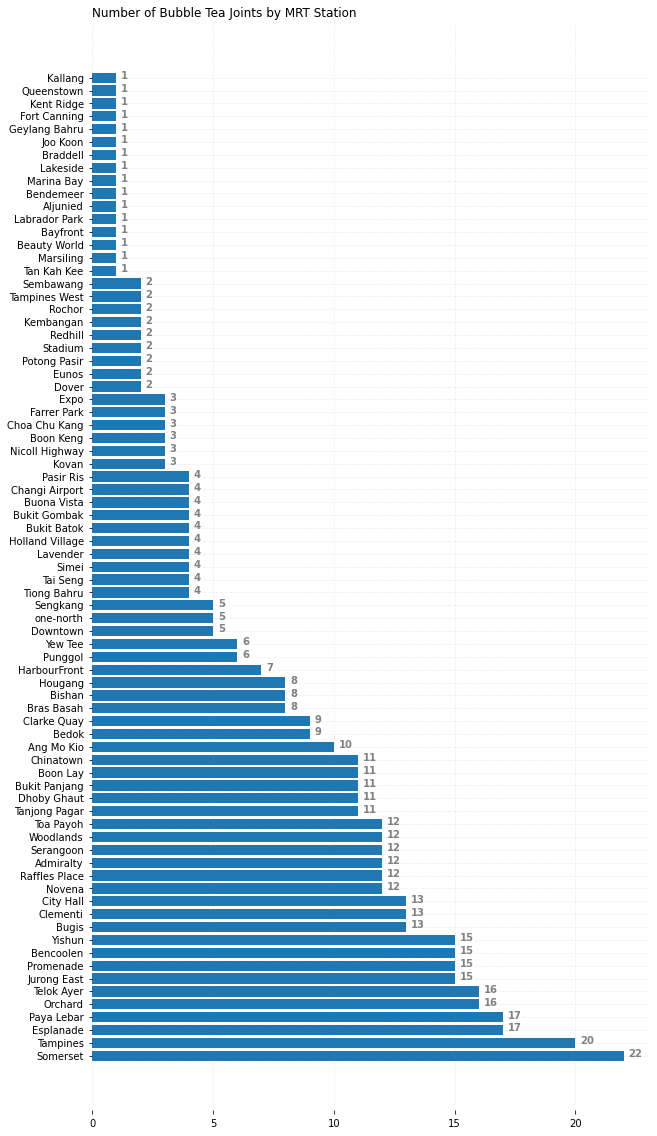

In [85]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize =(10, 20))

# Horizontal Bar Plot
ax.barh(plot_df['MRT'], plot_df['Name'])
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Number of Bubble Tea Joints by MRT Station',
             loc ='left', ) 

From the bar chart above, there're 16 MRT stations with only a single bubble tea joint. Let's visualise all bubble tea joints on Singapore map using folium.

In [126]:
import folium

address = 'Singapore, SG'

geolocator = Nominatim(user_agent="SG_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [88]:
# create map of Toronto using latitude and longitude values
map_Singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Lat'], df['Lng'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Singapore)  
    
map_Singapore

## Analysis of Data

Now that we have an idea of where bubble tea joints are concentrated at. Let's only visualise the bubble tea joints on the MRT stations with a single bubble tea joint. We start by selecting only the MRT stations with a single bubble tea joint and then we move on to calculate the distance between the MRT stations and Singapore's Central Business District (CBD).

We'll have to merge the dataset with df to obtain the bubble tea joints names and coordinates


In [102]:
df_single=plot_df.loc[plot_df['Name']==1,].reset_index(drop=True)
df_single=df_single.merge(df, how='left', on='MRT', suffixes=('_N', '_Bubble_Tea'))
df_single

,MRT,Name_N,Name_Bubble_Tea,Distance(m),Address,Lat,Lng
0,Kallang,1,Liho,24,"[5, Sims Avenue, #01-03, 387405, Singapore]",1.311320,103.871320
1,Queenstown,1,Queen's HK Bubble Tea,52,"[Queenstown, Singapore]",1.294424,103.806070
2,Kent Ridge,1,Share Tea 歇脚亭,93,"[NUH Medical Centre (5 Lower Kent Ridge Road),...",1.294470,103.784376
3,Fort Canning,1,Chicha San Chen 吃茶三千,374,[6 Eu Tong Sen Street #B1-K9 Clarke Quay Centr...,1.289094,103.846826
4,Geylang Bahru,1,Tropic Delight,8,"[545 Kallang Place #01-01, 339352, Singapore]",1.321459,103.871380
5,Joo Koon,1,LiHO,46,"[Fairprice Hub (1 Joo Koon Circle), Singapore]",1.327406,103.678327
6,Braddell,1,Q TEA,275,[Singapore],1.339238,103.849197
7,Lakeside,1,Tiger Dot,200,"[#01-89, 640517, Singapore]",1.345481,103.719469
8,Marina Bay,1,Bru Infusions,267,"[018979, Singapore]",1.277688,103.852524
9,Bendemeer,1,maaan cafe,362,[Singapore],1.310668,103.864341


In [105]:
# create map of Toronto using latitude and longitude values
single_map_Singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_single['Lat'], df_single['Lng'], df_single['Name_Bubble_Tea']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(single_map_Singapore)  
    
single_map_Singapore

Next, let's find the coordinates for Singapore's Central Business District (CBD)

In [129]:
address = 'Central Business District Singapore, SG'

geolocator = Nominatim(user_agent="SG_explorer")
location = geolocator.geocode(address)
cbdlatitude = location.latitude
cbdlongitude = location.longitude
print('The geograpical coordinate of the Central Business District are {}, {}.'.format(cbdlatitude, cbdlongitude))

The geograpical coordinate of the Central Business District are 1.2945948, 103.8539119.


Now that we have the Central Business District's (CBD) coordinates, let's calculate the distance of each MRT station from CBD. We'll have to select MRT stations with only a single bubble tea joint and merge it with sg_mrt dataset to obtain the MRT's coordinates

In [113]:
df_single_MRT=plot_df.loc[plot_df['Name']==1,].reset_index(drop=True)
df_single_MRT=df_single_MRT.merge(sg_mrt, how='left', left_on='MRT', right_on='station_name')
df_single_MRT

,MRT,Name,station_name,type,lat,lng
0,Kallang,1,Kallang,MRT,1.311532,103.871372
1,Queenstown,1,Queenstown,MRT,1.294867,103.805902
2,Kent Ridge,1,Kent Ridge,MRT,1.293629,103.784441
3,Fort Canning,1,Fort Canning,MRT,1.291631,103.844621
4,Geylang Bahru,1,Geylang Bahru,MRT,1.321479,103.871457
5,Joo Koon,1,Joo Koon,MRT,1.327826,103.678318
6,Braddell,1,Braddell,MRT,1.340550,103.847098
7,Lakeside,1,Lakeside,MRT,1.344264,103.720797
8,Marina Bay,1,Marina Bay,MRT,1.276481,103.854598
9,Bendemeer,1,Bendemeer,MRT,1.313674,103.863098


Calculate distance from each MRT with a single bubble tea joint to Singapore's Central Business District using geodesic

In [130]:
import math
from geopy.distance import geodesic # (latitude, longitude)

origin=(cbdlatitude, cbdlongitude)

s_lat=list(df_single_MRT['lat'])
s_lng=list(df_single_MRT['lng'])
s_mrt=list(df_single_MRT['MRT'])
for s_lat, s_lng, s_mrt in zip(s_lat,s_lng, s_mrt):
    dest=(s_lat, s_lng)
    d = geodesic(origin, dest).km
    print('{}{} => {:.1f}km distance from Central Business District'.format(s_mrt, ' '*(50-len(s_mrt)), d))



Kallang                                            => 2.7km distance from Central Business District
Queenstown                                         => 5.3km distance from Central Business District
Kent Ridge                                         => 7.7km distance from Central Business District
Fort Canning                                       => 1.1km distance from Central Business District
Geylang Bahru                                      => 3.6km distance from Central Business District
Joo Koon                                           => 19.9km distance from Central Business District
Braddell                                           => 5.1km distance from Central Business District
Lakeside                                           => 15.8km distance from Central Business District
Marina Bay                                         => 2.0km distance from Central Business District
Bendemeer                                          => 2.3km distance from Central Business Distric

From the distance above, Fort Canning MRT seems to be the most ideal location for a new bubble tea joint as it only has 1 bubble tea joint within 300m radius of the MRT and is the closest to the Central Busines District. Let's visualise this with folium. CBD will be indicated by a red circle while the other MRT stations will be indicated by blue.

In [145]:
# create map of Toronto using latitude and longitude values
ref_map_Singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

#add markers to map
for lat, lng, label in zip(df_single_MRT['lat'], df_single_MRT['lng'], df_single_MRT['MRT']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ref_map_Singapore)

labelcbd = folium.Popup('CBD', parse_html=True)
folium.CircleMarker(
[cbdlatitude, cbdlongitude],
radius=5,
popup=labelcbd,
color='red',
fill=True,
fill_color='#ff0000',
fill_opacity=0.7,
parse_html=False).add_to(ref_map_Singapore)
    
ref_map_Singapore

## Results and Discussion

From our analysis, it seems like the best MRT location for a new bubble tea joint is Fort Canning MRT with only a single bubble tea joint and is 1.1KM away from Singapore's Central Business District (CBD). We can also see that most of the bubble tea joints are concentrated in Somerset which is close to CBD.

## Conclusion 

The purpose of this project was to identify the best location for a new bubble tea joint that has the fewest number of bubble tea joints and is the closest to Singapore's Central Business District (CBD). By calculating and visualising bubble tea joints density with a bar chart and folium, we've identified 16 probable MRT locations for further analysis. After that, we proceeded to identify the coordinates for Singapore's CBD and calculated the distance between the 16 identified MRT locations and Singapore CBD and arrived at the conclusion that Fort Canning MRT is the best location based on fewest number of bubble tea joints and closest distance to Singapore's CBD. Final decision for the optimal bubble ta joint would need to take into consieration of additional factors such as real estate availabily, prices, social and economics of the neighborhood closest to the MRTs.